In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
tr = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Decision Tree\trainRF.csv')

In [4]:
tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
tr.shape

(2000, 21)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
tr.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train_tr, test_tr = train_test_split(tr, test_size= .2)

In [10]:
train_tr.price_range.value_counts()

1    407
2    403
3    398
0    392
Name: price_range, dtype: int64

In [11]:
train_tr_x = train_tr.iloc[:, 0:-1]
train_tr_y = train_tr.iloc[:, -1]

test_tr_x = test_tr.iloc[:, 0:-1]
test_tr_y = test_tr.iloc[:, -1]

In [12]:
logreg = LogisticRegression()

In [13]:
logreg.fit(train_tr_x, train_tr_y)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
pred_log = logreg.predict(test_tr_x)

In [15]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12)

In [16]:
dt.fit(train_tr_x, train_tr_y)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [17]:
pred_dt = dt.predict(test_tr_x)

In [18]:
tab_dt = confusion_matrix(test_tr_y, pred_dt)
tab_dt

# from Entropy - Decision Tree

array([[103,   5,   0,   0],
       [  5,  80,   8,   0],
       [  0,   9,  77,  11],
       [  0,   0,   6,  96]], dtype=int64)

In [19]:
print('Accuracy score is --> ', accuracy_score(test_tr_y, pred_dt)*100)

# From Entropy - Decision Tree
# we will use entropy as it is giving better output

Accuracy score is -->  89.0


In [20]:
tab_dt = confusion_matrix(test_tr_y, pred_dt)
tab_dt

# from Gini - Decision Tree

array([[103,   5,   0,   0],
       [  5,  80,   8,   0],
       [  0,   9,  77,  11],
       [  0,   0,   6,  96]], dtype=int64)

In [21]:
print('Accuracy score is --> ', accuracy_score(test_tr_y, pred_dt)*100)

# From Gini - Decision Tree

Accuracy score is -->  89.0


In [22]:
tab_log = confusion_matrix(test_tr_y, pred_log)
tab_log

array([[84, 22,  2,  0],
       [ 8, 52, 24,  9],
       [ 0, 27, 40, 30],
       [ 0,  0, 20, 82]], dtype=int64)

In [23]:
print('Accuracy score is --> ', accuracy_score(test_tr_y, pred_log)*100)

# from Logistic model

Accuracy score is -->  64.5


In [24]:
feature_imp = pd.DataFrame({'Feature': train_tr_x.columns, 'Importance': dt.feature_importances_})
feature_imp.sort_values('Importance', ascending= False)

,Feature,Importance
13,ram,0.661207
0,battery_power,0.119987
12,px_width,0.087979
11,px_height,0.059657
8,mobile_wt,0.014205
10,pc,0.012463
16,talk_time,0.007544
2,clock_speed,0.006725
7,m_dep,0.006474
6,int_memory,0.005779


In [25]:
mp_train, mp_test = train_test_split(tr, test_size=.2)

In [27]:
mp_train_x = mp_train.iloc[:, 0:-1]
mp_train_y = mp_train.iloc[:,-1]

mp_test_x = mp_test.iloc[:, 0:-1]
mp_test_y = mp_test.iloc[:,-1]

In [28]:
dt_mp = DecisionTreeClassifier()

In [29]:
dt_mp.fit(mp_train_x, mp_train_y)

DecisionTreeClassifier()

In [30]:
pred = dt_mp.predict(mp_test_x)

In [31]:
tab_mp = confusion_matrix(mp_test_y, pred)

In [32]:
tab_mp

array([[82, 12,  0,  0],
       [12, 81,  9,  0],
       [ 0, 15, 76, 11],
       [ 0,  0, 13, 89]], dtype=int64)

In [33]:
dt_mp = DecisionTreeClassifier(criterion= 'entropy')

In [34]:
dt_mp.fit(mp_train_x, mp_train_y)

DecisionTreeClassifier(criterion='entropy')

In [35]:
pred = dt_mp.predict(mp_test_x)

In [36]:
tab_mp = confusion_matrix(mp_test_y, pred)
tab_mp

array([[88,  6,  0,  0],
       [10, 80, 12,  0],
       [ 0, 12, 76, 14],
       [ 0,  0, 15, 87]], dtype=int64)

In [38]:
fea_imp_mp = pd.DataFrame({'Features': mp_train_x.columns, 'Importance': dt_mp.feature_importances_})
fea_imp_mp.sort_values('Importance', ascending= False)

,Features,Importance
13,ram,0.667609
0,battery_power,0.109505
12,px_width,0.083082
11,px_height,0.067319
8,mobile_wt,0.017204
9,n_cores,0.012152
16,talk_time,0.007410
15,sc_w,0.005719
5,four_g,0.005595
2,clock_speed,0.005487


In [41]:
from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus
import pydot
import matplotlib.pyplot as plt

from six import StringIO

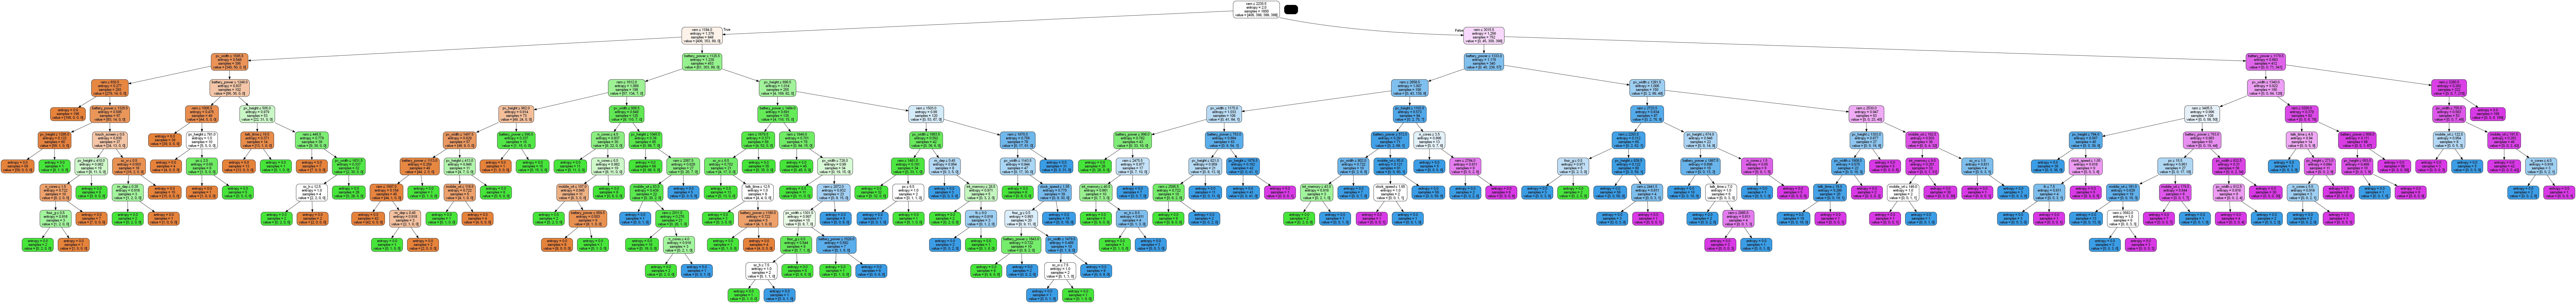

<Figure size 864x864 with 0 Axes>

In [42]:
dot_data = StringIO()
fig = plt.figure(figsize=(12,12))

export_graphviz(dt_mp, out_file= dot_data,
                filled= True,rounded= True, 
                special_characters= True,feature_names= mp_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [43]:
dt_mp = DecisionTreeClassifier(criterion='entropy', max_depth= 5)

In [44]:
dt_mp.fit(mp_train_x, mp_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
fea_imp_mp = pd.DataFrame({'Features': mp_train_x.columns, 'Importance': dt_mp.feature_importances_})
fea_imp_mp.sort_values('Importance', ascending= False)

,Features,Importance
13,ram,0.788960
0,battery_power,0.100832
12,px_width,0.069731
11,px_height,0.040477
1,blue,0.000000
18,touch_screen,0.000000
17,three_g,0.000000
16,talk_time,0.000000
15,sc_w,0.000000
14,sc_h,0.000000


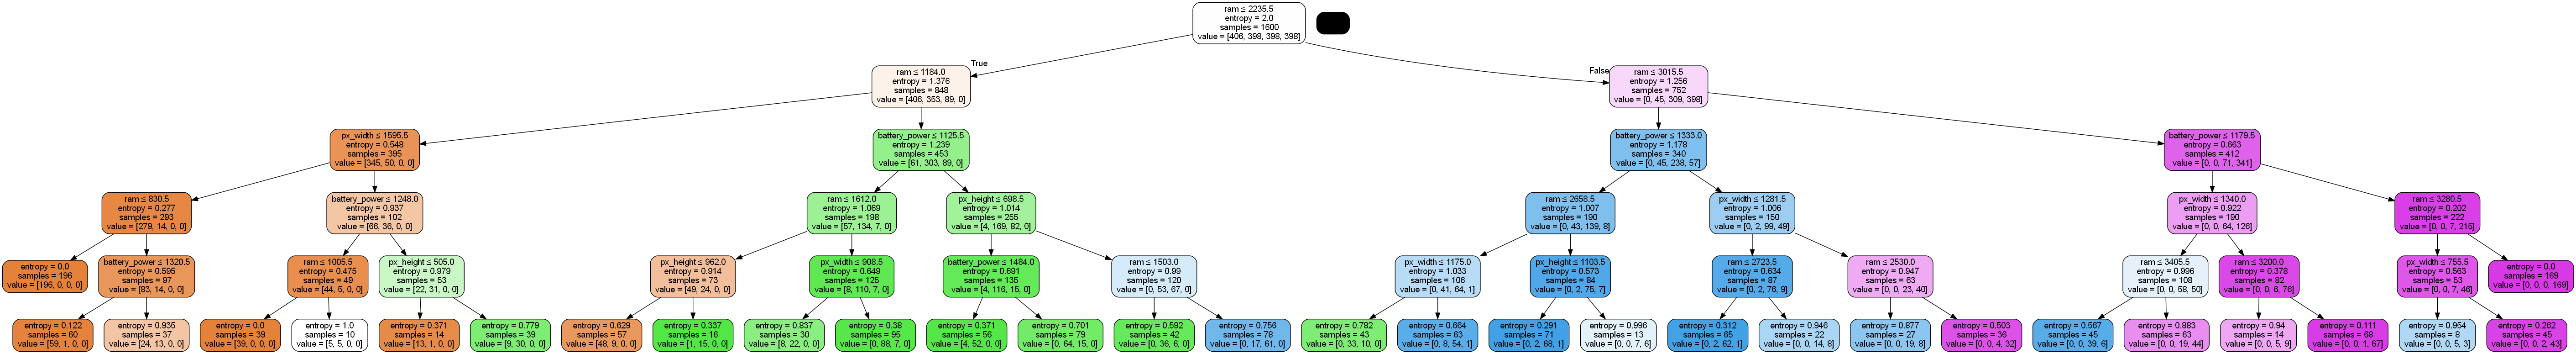

<Figure size 864x864 with 0 Axes>

In [46]:
dot_data = StringIO()
fig = plt.figure(figsize=(12,12))

export_graphviz(dt_mp, out_file= dot_data,
                filled= True,rounded= True, 
                special_characters= True,feature_names= mp_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
cn =['1','2','3','4']

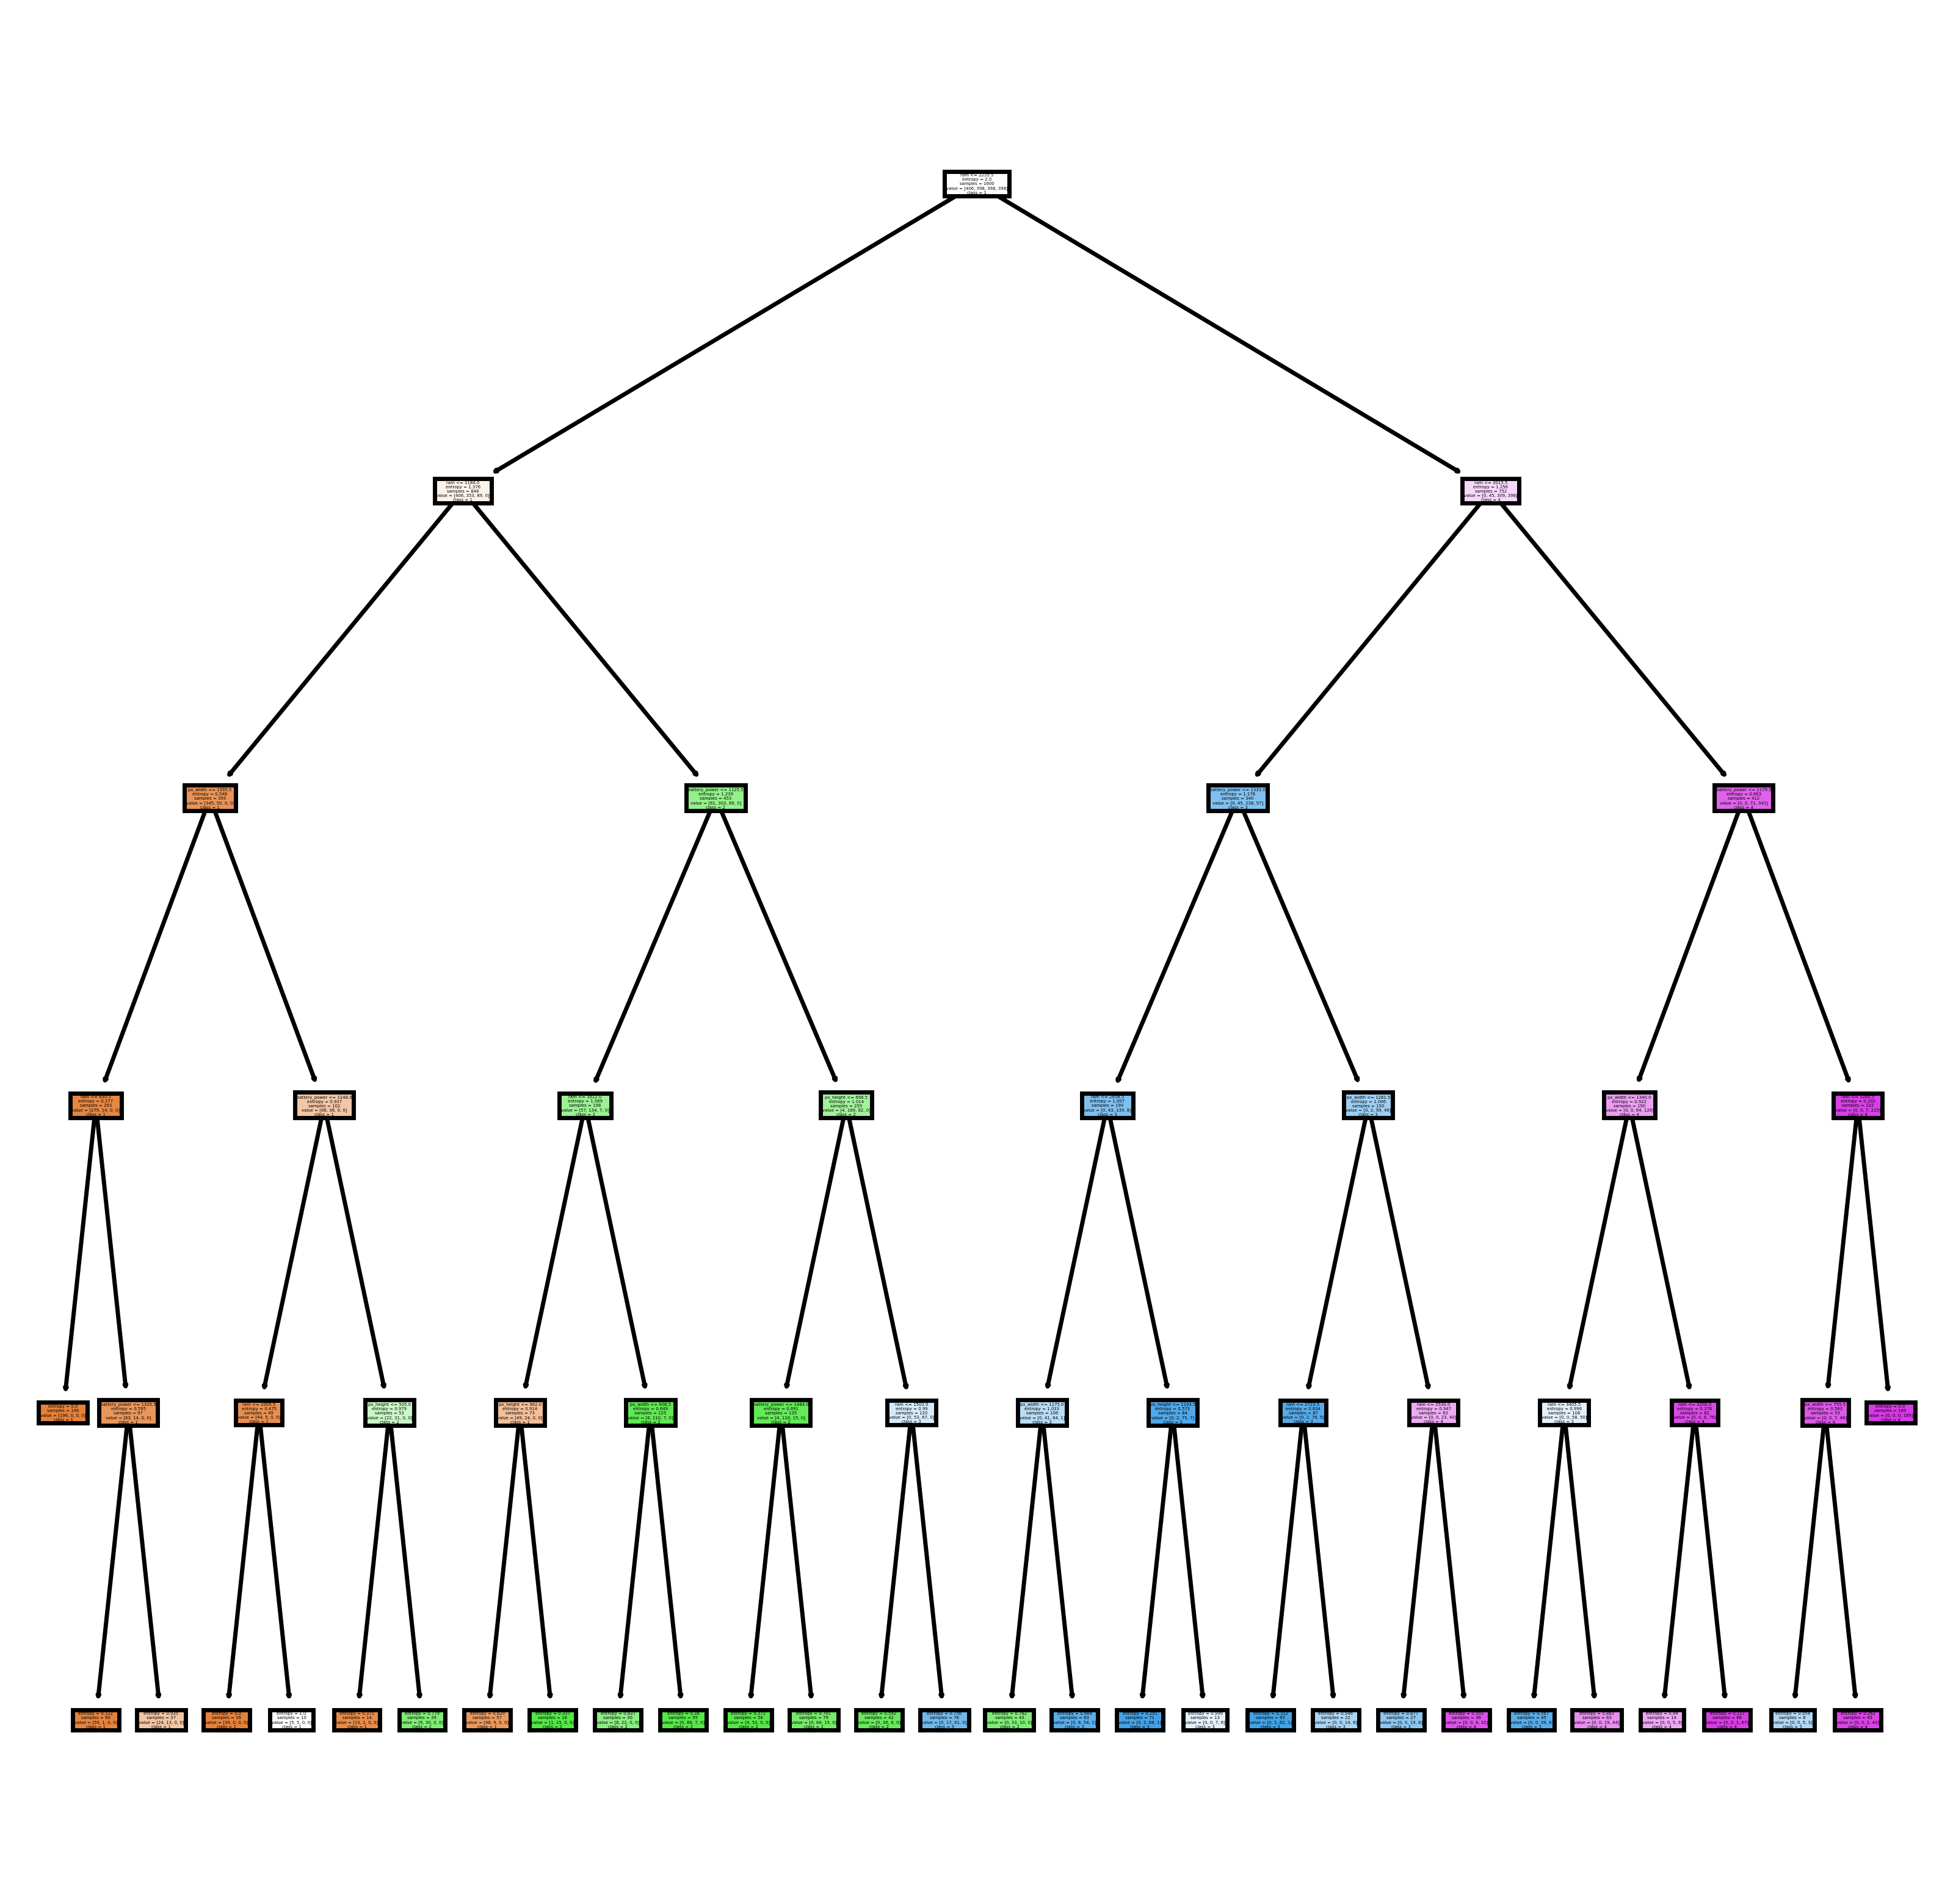

In [49]:
from sklearn import tree

fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(8,8), dpi= 500)
# This will enlarge the picture
tree.plot_tree(dt_mp,
               feature_names = mp_train_x.columns, 
               class_names=cn,
               filled = True);


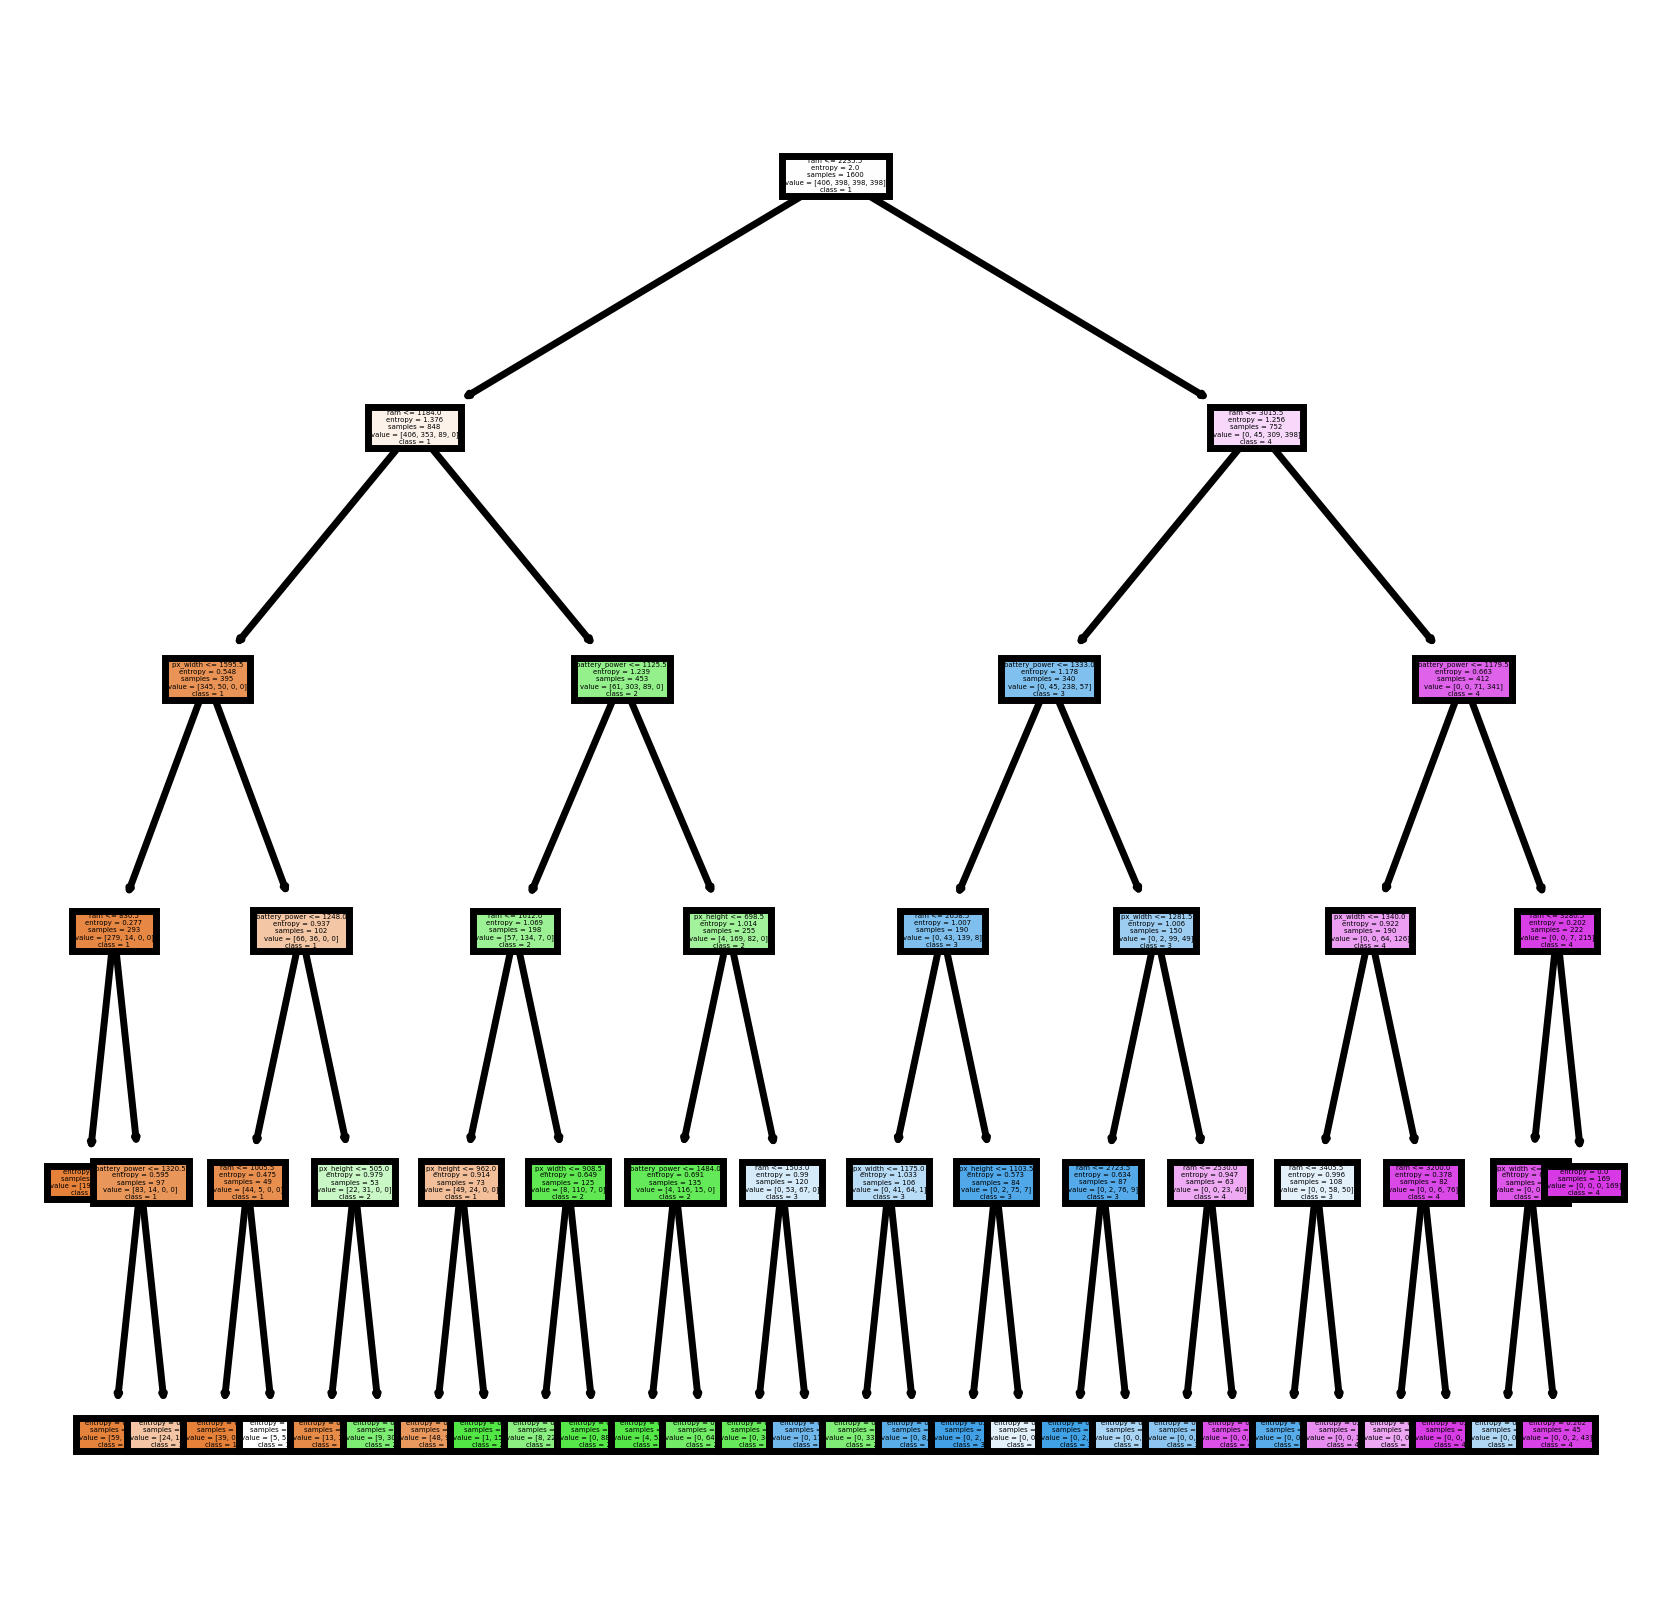

In [50]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(4,4), dpi= 500)
# This will enlarge the picture
tree.plot_tree(dt_mp,
               feature_names = mp_train_x.columns, 
               class_names=cn,
               filled = True);
